In [1]:
import pandas as pdf
import folium


In [3]:
dframe = pdf.read_csv('Dataset .csv')

In [4]:
dframe.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:

grouped_by_city = dframe.groupby('City')


In [6]:
restaurant_count = grouped_by_city['Restaurant Name'].count()


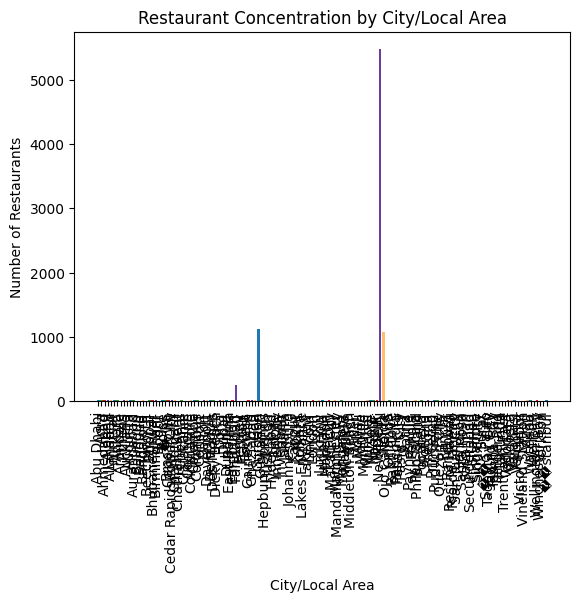

In [7]:
import matplotlib.pyplot as plt

# Assuming restaurant_count is a Pandas Series containing the restaurant counts
plt_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#6a3d9a', '#fdbf6f']

plt.bar(restaurant_count.index, restaurant_count.values, color=plt_colors)
plt.xlabel('City/Local Area')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Concentration by City/Local Area')
plt.xticks(rotation=90)
plt.show()


In [8]:
from sklearn.cluster import KMeans

X = dframe[['Latitude', 'Longitude']]

k = 5

kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X)

dframe['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


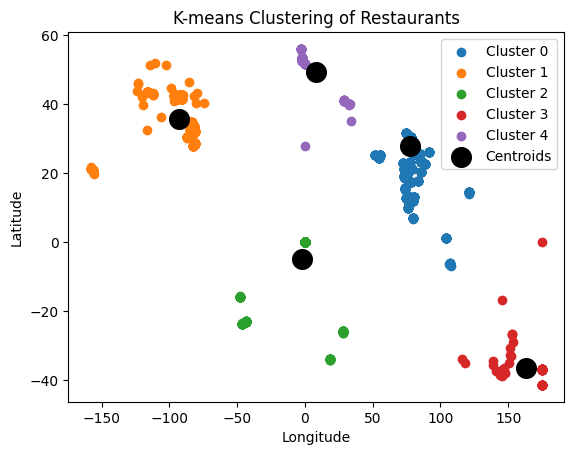

In [9]:
import matplotlib.pyplot as plt

# Professional-looking colors
plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for cluster_num in range(k):
    cluster_data = dframe[dframe['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=plot_colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='black', label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Restaurants')
plt.legend()
plt.show()


Average Ratings by City/Locality

In [10]:

average_ratings_by_city = grouped_by_city['Aggregate rating'].mean()

print(average_ratings_by_city)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


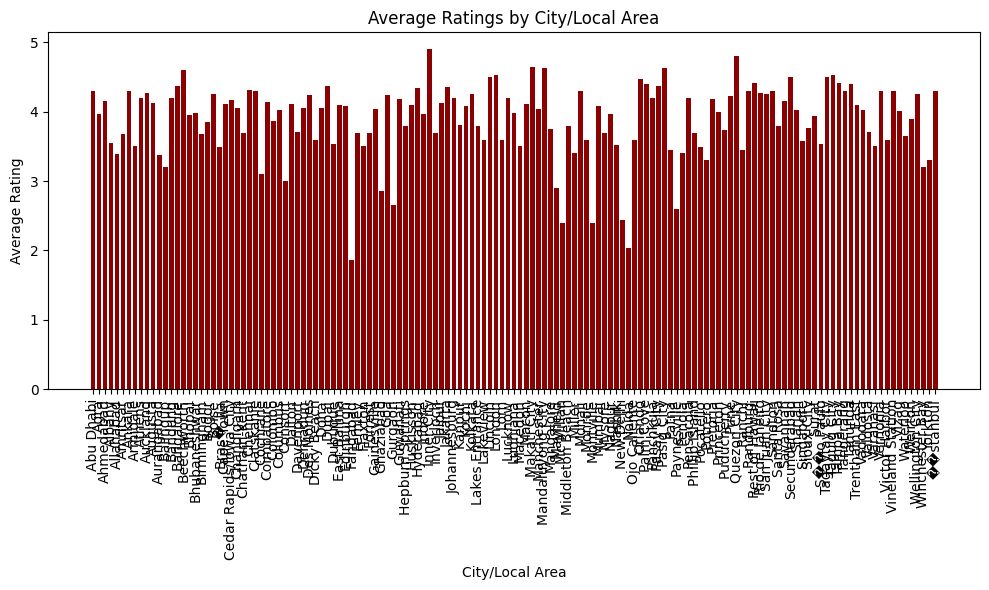

In [11]:
import matplotlib.pyplot as plt

dark_red = '#8B0000'  # Dark Red color code

plt.figure(figsize=(10, 6))
plt.bar(average_ratings_by_city.index, average_ratings_by_city.values, color=dark_red)
plt.xlabel('City/Local Area')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City/Local Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Popular Cuisines by City/Locality

In [12]:

popular_cuisines_by_city = grouped_by_city['Cuisines'].agg(lambda x: x.mode().tolist())

print(popular_cuisines_by_city)



City
Abu Dhabi                         [American, Indian, Italian, Pizza]
Agra                                         [North Indian, Mughlai]
Ahmedabad          [Cafe, American, Continental, Armenian, Fast F...
Albany                                      [Japanese, Steak, Sushi]
Allahabad                                    [North Indian, Chinese]
                                         ...                        
Weirton                                    [Burger, Greek, Sandwich]
Wellington City                                               [Cafe]
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
��stanbul                                                     [Cafe]
Name: Cuisines, Length: 141, dtype: object


<ipython-input-13-ab1dd54133f0>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


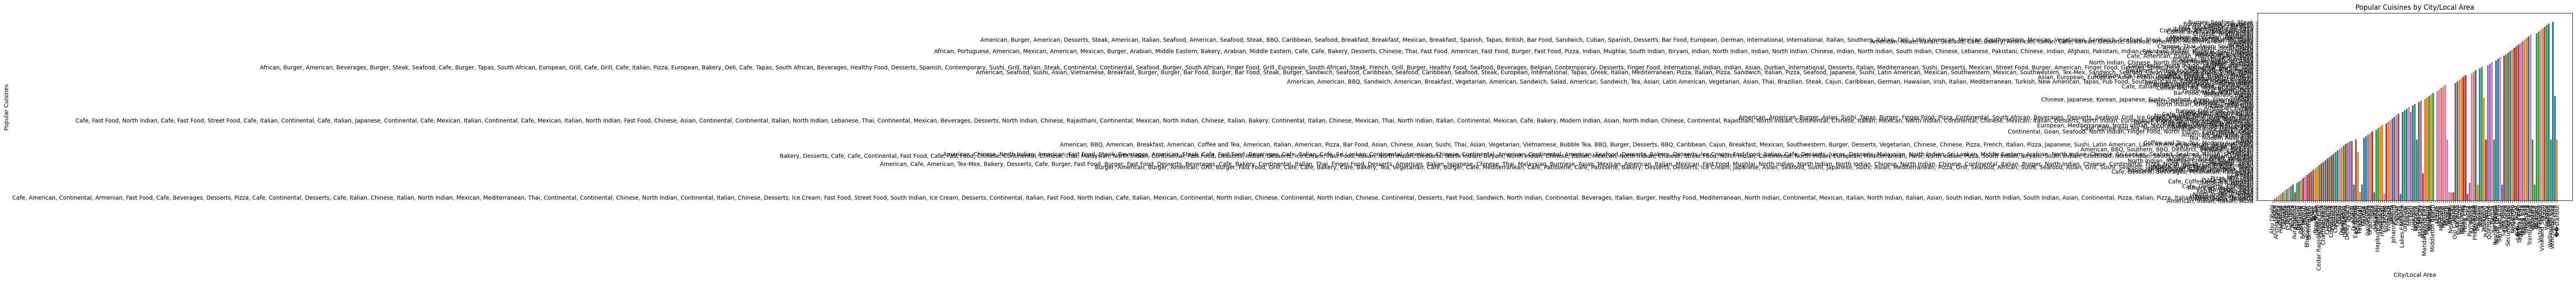

In [13]:
import matplotlib.pyplot as plt

dark_colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(10, 6))
for city, cuisines in popular_cuisines_by_city.items():
    plt.bar(city, ', '.join(cuisines), color=dark_colors[len(city) % len(dark_colors)])

plt.xlabel('City/Local Area')
plt.ylabel('Popular Cuisines')
plt.title('Popular Cuisines by City/Local Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Price Range Analysis by City/Locality

In [14]:

common_price_range_by_city = grouped_by_city['Price range'].agg(lambda x: x.mode().iloc[0])

print(common_price_range_by_city)



City
Abu Dhabi          4
Agra               2
Ahmedabad          3
Albany             1
Allahabad          3
                  ..
Weirton            2
Wellington City    4
Winchester Bay     2
Yorkton            2
��stanbul          3
Name: Price range, Length: 141, dtype: int64


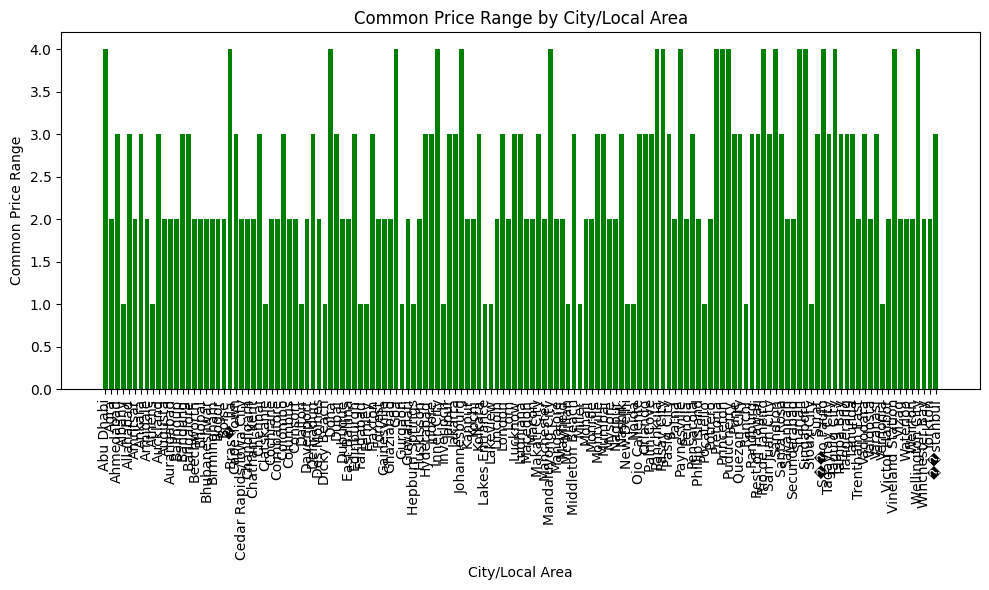

In [16]:
import matplotlib.pyplot as plt

red_color = 'green'

plt.figure(figsize=(10, 6))
plt.bar(common_price_range_by_city.index, common_price_range_by_city.values, color=red_color)
plt.xlabel('City/Local Area')
plt.ylabel('Common Price Range')
plt.title('Common Price Range by City/Local Area')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Cuisine Diversity**


In [17]:
import pandas as pdf

grouped_by_city = dframe.groupby('City')

cuisine_diversity = grouped_by_city['Cuisines'].apply(lambda x: len(set(x)))

print(cuisine_diversity)



City
Abu Dhabi          17
Agra               15
Ahmedabad          21
Albany             17
Allahabad          18
                   ..
Weirton             1
Wellington City    17
Winchester Bay      1
Yorkton             1
��stanbul          11
Name: Cuisines, Length: 141, dtype: int64


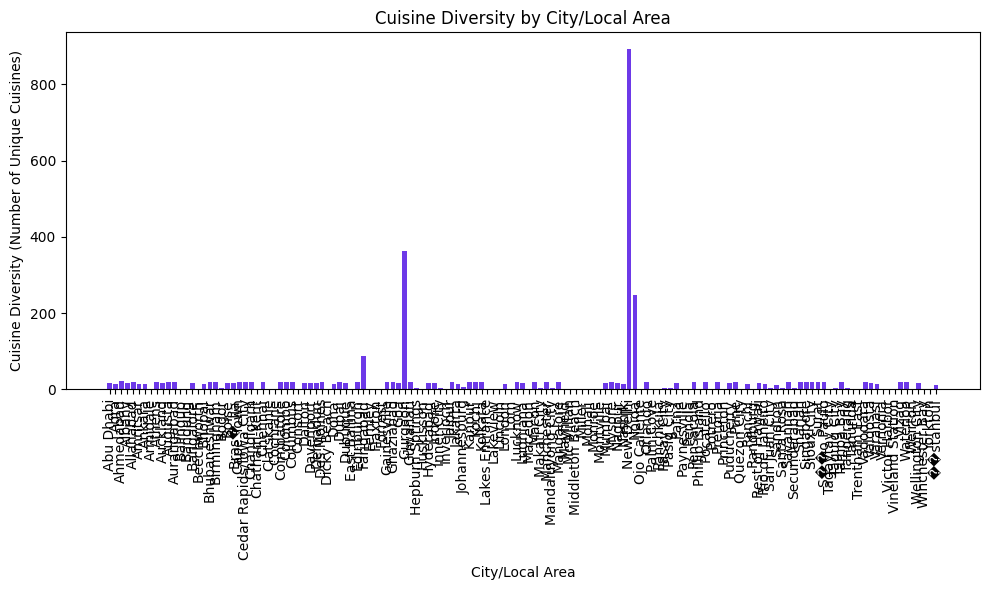

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(cuisine_diversity.index, cuisine_diversity.values, color='#6D39E8')
plt.xlabel('City/Local Area')
plt.ylabel('Cuisine Diversity (Number of Unique Cuisines)')
plt.title('Cuisine Diversity by City/Local Area')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
